In [222]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [223]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [232]:
# 1.deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시요
titanic.drop(columns=['deck'], inplace=True)
titanic['age'].dropna(axis=0, inplace=True)
titanic['age']
titanic

KeyError: "['deck'] not found in axis"

In [233]:
# 2.생존자와 사망자에 대한 갯수를 구하시요
g1 = titanic.groupby('alive').count()['survived']
g1
# g1.rename()

alive
no     549
yes    342
Name: survived, dtype: int64

In [234]:
# 3.등급별(pclass) 평균 생존률을 구하시요
g2 = titanic.groupby(['pclass'])
(g2['survived'].sum()/g2['survived'].count()).round(2)

pclass
1    0.63
2    0.47
3    0.24
Name: survived, dtype: float64

In [235]:
# 4. SibSp(가족과탑승) 의 평균 생존율을 구하시요
g3=titanic.groupby('sibsp')
size = len(titanic.index)
gg3 = g3['survived'].count()

(gg3[1:].sum()/size).round(2)

0.32

In [236]:
# 5. 혼자탑승(alone)한 인원의 평균 생존율을 구하시요
g4=titanic.groupby('alone')
size = len(titanic.index)
gg4 = g4['survived'].count()
(gg4[1:].sum()/size).round(2)

0.6

In [237]:
# 6.성별 평균 생존율을 구하시요 
g5 = titanic.groupby('sex')
size = len(titanic.index)
(g5.count()['survived']/size).round(2)

sex
female    0.35
male      0.65
Name: survived, dtype: float64

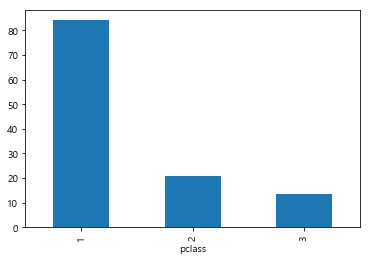

In [238]:
# 7.등급별 티켓비용(fare) 의 평균 차트로 그리시요
g6 = titanic.groupby(['pclass'])
g6['fare'].mean().plot(kind='bar')
plt.show()

In [239]:
# - 8.나이분류 컬럼을 추가하시요 - 
# 9.1~15(미성년자), 15~25(청년), 25~35(중년), 
# v  35~60(장년), 60~(노년)  으로 표시하시요. v

In [240]:
# - 8.나이분류 컬럼을 추가하시요 - 
def grade(v):
    if v >=60:
        return '노년'
    elif v>=35:
        return '장년'
    elif v>25:
        return '중년'
    elif v>15:
        return '청년'
    else:
        return '미성년자'
    
titanic['ageGrade']=titanic['age'].apply(grade)
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

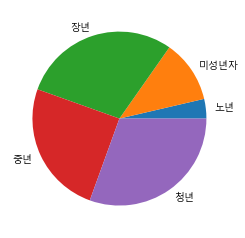

In [241]:
# 10. 나이분류를 파이차트로 표시하시요
# titanic['ageGrade'].plot(kind='pie')
g10 = titanic.groupby('ageGrade')
gg10 = g10.count()['survived']
gg10index = gg10.index

# titanic
plt.pie(gg10, labels=gg10index)
plt.show()

In [248]:
# 11. 생존율이 가장 높은 나이분류를 구하시요
# g11 = titanic.groupby('ageGrade')
# g11['survived'].count()
# gg11 = g11['survived'].sum()/g11['survived'].count()
# gg11

ageGrade
노년       26
미성년자     83
장년      209
중년      178
청년      218
Name: survived, dtype: int64

In [243]:
# 12. 성별, 나이분류별, 등급(pclass)를 멀티인덱스로, 생존률을 값으로
# 표시하시요